```
💡 Colab Dark 모드 사용을 권장합니다 (도구 > 설정 > 사이트 > 테마)
```

# 숙명여대 Winter Camp❄️ Elastic Day4 : Elasticsearch with ChatGPT

[노트 소개]
* 본 노트에서는 특정 Domain에 대한 적절한 답변을 해주는 간단한 Chatbot을 Elasticsearch Cloud, ChatGPT API를 활용하여 구성해 봅시다.

[노트 목표]
* 사용자의 질의에 대한 답변을 ChatGPT API를 사용하여 반환할 수 있다.
* Python&Streamlit을 활용하여 API 활용과 간단한 UI를 구현할 수 있다.

[참조 자료]
* [Blog - ChatGPT and Elasticsearch: OpenAI meets private data](https://www.elastic.co/blog/chatgpt-elasticsearch-openai-meets-private-data)
* [Eland python library](https://github.com/elastic/eland)



```python
🐘
""
미리 준비한 모델로 분석할 데이터를 크롤링해보도록 해요.
""
```


## 데이터 크롤링 with Elastic crawler
1. Kibana Menu > Management > Intergration > Web Crawler
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4NjKpazTrwvanVKeiZAHTJkSiKl_RBxMviihKrkpFiJ6pu92ilpD--bbxhnaCeKpI0Ow3u_fLzprCFxdFvxVqZXsWXZLZIjU9Ce9_PU8oBYMlyLcKAmAhTFzz2cmbGYV9wOqPTAH7eZc5rgJ3-3_QbM-RnkTtWQ3QYmXFcEKgerMkrCV04veXRPKY3n4iT3nFyeiqaj9DtZS-PU6czqIOBZ_h_IX9ft1BLPaWJHe1Im8W8vv24AWKyWi_WoltZb6bAOAL8mYqTvpBFgWPpzrAGp7G8WEVof9iivhOc72PMkKSn6Ru3HfVuIh8Ld12ijrYTDlKkWBUfJyagrHd6NlLNPUQ5feHH2HRbMq_wOtbLhPff8EkVtg0Q-UQp_4CXHvN_mh2RNMo6K8X_JUPP3Aly0T0JFdeYrmfVXOjUGwgzVKG4mPsOH4Al5jiM67cPC32FbQGcskMejLezTFdGU8U1k5I3mO2jpnMe99yybE65tmAT8suC4SnnOGHxvefVyQSzxTv4J0Zi8GPp2m0UpvTwkcaqxoawCDHyYkDhb32V_Tr42W2bo08tJT5MNUzr5W5mJqEVvB_bNqm7qLLhTg-mmwmCA6AY-oeWGcFUC9cStu_DTXdQzNwH6y-fHsWsYfdmvv4CqeRqA0__mQd0OmKFYsXekJOwz3RGtETto9HUwWEmxUrSUfY_k-uYGPBdklg6ZEpy_QVoAJP_-MVQ_RbdiETz6hiC9hdCIGLeaBH-SA-deTapVtNbxcdoOubbUr2YKcD-FXUiPr5yBnxTuulcDoLX8NYY5CLs5w1jnV5eqH0iAT0tDyzHJFrRVNv6MG4RZlMgpoEvS3GipJckW7SP_qkBk0vkQa96vDxBmKNjUosxp7C-7egwlG6JqACS18K16oOtUve6qXUqlM21wngCM-LPPISZy7zbo-0yTMA-h5UThz6U6uSN0lIyX79moyA8QnS0y_zZ4cAOCxZBCGX1vS95BX3-8is26M5H0WFl5r3eFK7qF5whK2JLiY_HUUlsM8XR2rSU_6F1OnB5RKk5nYvvAJaD4I33pBU-0PsI2kyLq0FxLXB1NT3kRXzyD3Z9EnREPyZc8LEJHJEEkc3xOitpTxdUwXyPKmcVZncLeG1rdTGG2kCTNVBzI4l8AeR-tw8xYmW8wuPMT_LwziE_V86PM5nI_zE_GwoTXPtwMcl76Fx95pRai-CicCrEWd2xOPMVso3xtaiIqc-5jGjQf9saaJibefmbqAbMMwJbz1l3ojGoaGmXq5hjROv1cl03IWB8a14cmNFYYWqyciZQlXuW3S-z8F4cWBOI9oadROHZladJjtgpUvypnNtW_UAoY-ncoqrEPsxxHyz3q565cHX1Hd378uN_jo19veekCQgfuLQi-JvR4U3RAQIdjF1QOs69XAkvAMQn05Qgn1NjHkIBkEdqtCRu-uPPbKMCAzCWDQgfSRZmGIInOJTLdhwVgW37O7strq3a-cwSL7g4wB_cUokj1N-kJk7uFPX9bh0rX_31VSQVlubV2F97h3psQmnY0TgOA-0yby2mntz-esXxzbzrxyz6UAg92WhYXCnq9vbB2PJqtaXdz8nYH82rVk-PAhXfqNUqIctvlv7I-DhEiZtFOfIKYzH4XtnbRehtHSpVvIzFkpflfTQPDmCfI2RzPta1Qa0P_Rrkjq-hGsTkmjJYfGTOQu_se_Br4Eyva7OvTwZkKOQ=w1142-h934">
2. Index name = (search-)elastic-docs 입력 > Create index
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4MHayXc6nq7XMvumm1_Zay7_cGbbDggrzHRJ3pWVwM3EcrE4veY0E8nGQoYa-O1PJfrhUwrzp8Ckc9TBelyfnYxZ2wCQiXifdMiq4XtyoMg5trZipYYXyyszw0bvqtrU9opOoJ-jo4PVG1UeOuc0QEOwwOJ0woCDSnl-tRQOn629bJFuvAghhtDyHUU6jHO6FKyTUs71GLmcBM2qCxXFK5Ha97pYn8YKvSC6pESuKYpyy31ZZJf1oKMz_Ha6BugERUGx8C-tENeflMSqKJoj2iydyxurzJGs7_yZDVGtvluJvxBAA-DWwcOZN5OyksV3vlKHmcEsoKCw7Zd62smAe_MBApuzod2SP_nKqBsiW13PC-9x5TJdgkGTz6oZNLtEceJjL3YB6bVV14JcDkRccdRcZ_8RJkKAkDGGrPA3zHiiPQrTB7sXX0B51Dh14DuM2ftcoIfgN8n9VIBmfpC7fsQ96p7kyBVp92JnsPig0isVDufBTWWsTmKp-R_DuBvmNEmbKkMQfo-K3VZ6LUbanEb0WjGHJNPmuxugnHvpWzg-E_x68MALhj1yIG0oh1g-bFx4zmmMVCKpXxogOwVYJQ_Mr68DqTIK8u_dDdwOGl9Sr1xo__3US9o12-cLwmJpBAAarHE4HKTv6XPq1QmXwXEXB9TKD4NiUzI4DaUuV0s6UJYcPVde5ot3kFnIRLpat5aVe6kZ4-c6aKhOk8MPW6zdJ-9In0Ua2ewJdj4zv6CCjCPgylKRD2N7d24x4D6hXpeqvMghrugz0OfGC03CokaoQlBcgnB8evxDlQ6m9rcGFd9y1UrsoMTXVyMMszJmiljXbki7nGWDdegUBg7_yf1CiHhBtWKbHLNtuBXoKobetI3-OFQ6C06zegUZlfsvHyUFt4rO_dXItGs88FuzoblmEYoo1z2Un0JUV-1trqy7E_-z8eGolfR_NFKRoX7Att7PKSLqxJ9A8HrU1A0ACRH_kB0W9knMPABnW3Q62fojkt4WTmE19GnlC60RsVF1GybY-el5Vr1l7N014npwffFnW5FcyNNehSajwDaXwonbOIKE7BYayO7yOfXBdfSn56pOlHqHwfCADNLefnE86Pmk4Qb-QwIw1SxIrPZ_bYqHLkb206nXITogijnzjuDtlWvkNzPy9QqhnQl7NYnJa8uPkTWZ2IYcLY6bRZfE_DCZwDHTLazBfQmYJNAy9r0XYgNwpuO3lMMc8_pboIBcd2Fb4fnNQAYhV_7TGbgAyYZm4qCSX2bw6_bWTDXLsv1_c64Md9rjn1OPCvTZdqrhDvwM6sB6Jxbn3K5qhk0_hB2VaxQh9T56AUU0B2WJI1hST-WbK7GED1qmDhisGcwoDVtSOR8i2J8F5F_LePRG2SJ89OQsM7dt0jg2qCAVGKGUR0fy4LnhG-Bd6MOV1-o1c4jLDLEsccip_6JB-a1ce8HhhPbSBrqThvB3PAkP8Vpz7lduaDNSi5Bs-lJSYbvW5wKYaepuPJD2QWaTR_VXYH23PDfWFK9G3dXRGcEIhTnrnkrfkRW0ZlYV1_deZ5Wp4jgzFZZW_Tk27FgkkgLUJyqz_uDJoITF2-wcIhI8oFOCSrM2t67oCgXK6QjpsAjKN2u5pi62Vbof8PGae9P_ZNuyLrreRdC-lnk5rWfvWWkJE1oSa0MPqABERRattmAaiOpYtA2G4Vj_dzkpZlIKB2x6yLw4DhQAAtFRw=w1001-h934">
3. Kibana Menu > Management > Dev Tools > 아래 쿼리 입력 및 실행
```python
POST search-elastic-docs/_mapping
{
  "properties": {
    "title-vector": {
      "type": "dense_vector",
      "dims": 768,
      "index": true,
      "similarity": "dot_product"
    }
  }
}
```
4. (혹시 직전 페이지가 닫혔다면) Kibana Menu > Enterprise Search > Content > Available indices > 'search-elastic-docs 클릭
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4PYzoMkhGTH5tw_70RQvcuf6NzOhwZwfcJwuWcPVzQdrm9Qw4xVT9eRK46gTR1WhEuCPjJ3dYfD0yrgmhfonzkvwWaVibqf7eDfQnbFOJK_mMo0mktRqfsCdr1lRepXsRoAxGBjU1X3DVRwuTUUbFdtuXikLQvATIz5I0G4buOvgRdt2V7wZ0kpnclHDakBqQcKK-X21P6ipgJ2KJ50qe1519aNfgZ0He_XHs8jMn94yWFFsjlQwwJh2pofVFZbPJijDuRJkFsJSdOjSUIyR8uw22FJMMWI_iLN-xc10bRkS3uI6Fkc_-Txl7IjlrDEHhrnhWzkpaFXhZbhjyYndtyBRh3MUeisPU8rY6EgUm_uJCq1zJZBe005dxl36-Kf5nXoaQ5Q7TzVmsww64KsBm_jk9ibXm9VrhRrofg6ym_uJVfPNFhlnCgdJLILPZGKQCEDugUguPEel9J_AQl4a83bMDv-FThQpBdq9P6iNXKzBNToHn4MBB8aJq5Ba8LmRm8ZDHTmCjlp8PLyOFt1zl1IHmwa0K1mfQ3_9gyRCOzs7uqLfMIhE4rEMzEMgh8CDwuqJ3a3FYEu4eJERQ5WbSkUEl7GY7RDc2Ng_anie-DfaC9G-lBGZBW-hMgF8BJzB8AMhYfBqGHr2C4txgfERCOtTMXUY2jpGydDmO2iSsJpYOUgKkrPxGGvT81rU74BchqnnsoV0BE1pUDt1B6ltp_Qy-AxWu6ELFpl85sRsrg4npYWf18T3BRdD0Yb8qJnvM-8UaWFKLuer--XAVk62KIAWBAyi3l28JPhaqDQBPzsCNxkCNj1QVjfjrdJqcuYCOo7czaUp7fWkCdbHem6AXrJi5I7jcDoH4AJd4e56N1moK_YCNtF6IFLR-xp05zXD7gSzwtGVAApUq7Y9TLab_mCRZYe8rT9ajzWzQ5RaBgE-hLWdAQWxw2zrfM5EDWP5l_4ZXB7-v8NuL-xisVlDlNTzBrqLtEyLVyEusSP5ou-slq4r0NhYW3Kc7pvaRabmztc1x1TYKeqJqutw5JPLhyeigG7-aC-CyEJdQk-MUABOwKFkJVBsacXr86eRNqQA-mMvhspXVSI8TLh-ZPhn0tUBmheukmbl0ZrenqG9wCzHQeb0-aSPmALap9gH8vUEEjHZ8K5Nfo2ACFvOmYi_fCpi0m4I4O2J63oeC_MBryCgUVUqw934YV0N68GB9xCKXVaJS9xYuOmAon_Tu6rK63mR8aRYtEDXg9Rh2rTkXC55yEOpD3BQmzz8w6UKOr5fioN8c-zJAr1ivo00O0zggUWg2zp5TkL2LGzcnVoPL2W9kD8myQfPEYL820jutymXHmjVIgzMLhBQS-sqEIGt8KkV3RMP_ba-ORcQPdjQh1f8Fl1kYz_q8TLGcnBeg_gOXP6tKaME8OxAXcGTNMMQv68yG9aHzUf1hkofJRjnGOU-Bw9yXqJMjsrprMLzeR9yt8ZBZKceIc5GmjenGiIk3ip7DmaDRo-lX5of-BJbgUvIPQb7Doa7DcU2bicCkSc-xJa0OcdXESf45Iu1znHoNzIPz7-iPC2m5WtGxT-qtkEVoIyRPpWMZ80Q_WGZkrWk70S51S7gn_3Nsh1DPDCeutk75otvo-c0U6FVGmJBAQqoXjPD-7yOyJLkPIFo8-c7kOQ8zo7syfxCbwYIEFfiY50d5EyLTRrk1AAKwnPInrNdA6PrGB4brdoaw=w1001-h934">
5. Manage Domains > 'https://www.elastic.co/guide/en' 입력 및 Validate Domain
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4PTl8vGTUcKFHXd4RKaEpiRd01bfZLpXzWUABu9_AF9h2EPAjwrswCdmMYGNTrDV9tNq-Qmdv1p0arJiObkuCaSItx1ecWJcYLtWPzewtoTdvc47SUanebX0Tyx3wyfD6C8pXnmbYYujRD4fGHGyX5HgVFTBJ8Tts4JLVIu6Iu1gb6SVQPdQXZeBNdeozLdBGzXojMfu3jNfzJlZ_piSmy3FX3GdyHoJg_GoZaeN5ZWfFyT5w6bLsfWxFBibVOB5cLyDP6u_GVIpPE7ubiugE1-ZUw_Ho9c_RxL-6Iv_p3-Sjiyx9F092k8umaDb3ZOLD5ZvlgjiT5NBMS0N0NTNrr6N1GvJbr4AM3xpKRD-baVTn9r2zGlrieGzZSet0chntwCFaMisbQ34jpytqktcunfND1JGRHmzh1b7xjVt-QhFMeWr8tQ-m5ulVpZ1FbF-6GawfvrcY2c6aymbbFpcGS_2cH8EPDSLttmCkDKtG2yh0Do-D6fnfUr4PxtuEb9TCTYAaLuwtPd4pXAm2SihLoebNCLGeLibC4GpRai1jQMgvAony0BK-8_Q2I5edLr_1A92ubQQ0adHJ4iA0ki2rU03LI98SVxJwnlbd89imhcefyU7jA7VWvxtZ-ANL0JUsIKJfc11cJb58pb96FXe2CFstLRY4Ow6IdSWbP65gdKbK3sXxsmUAOxGel28Jj_FBsIqNw1oX0YXtBaAdyLeueZtbAKq99PwgwFDI6K5xcWQ99MSR-50KpMyt7dbD55h-digAwDLFCduvVRpwGyH288jtg2Zu-W_u53TKGK29FqLRaOG1Ce1AtFpdxRkIcmBkQGLTCrKwNKGHgDhMND-5TqJBwlL57fqqxxUn3JNNow5LnUrIlXvRvSo63Is3WmBLnPwAeVHx-ifqiJ2Hg6wnu_O3fA9Z0Nvf7G-1Zg48YQefT8DNrRquMHtPjdM9nCkXgRgaSOqWMM6My9bhexmn4hXmyE_oQelJDOiopM5CoLRt6pGJJF93zwfQKcRujz0a_s0gHrl3peTHtA87JwOl_5uXJOVPW1hWryhNzEDmO9wM-DtSFIap-ZB2i-0y32fVWw3cNENxZXT-RSAmI1XNZWxEWukORpqRRKrGlghQ7j3i-6W2JG9YVn6hQkUMYMpYvUU2zCxcGl_fa1G5XaBQLjh7B6Zgf3hsumZtASQjPAv9Eie95myxEvbS_HL_HhyXb46K-IZ41mqhI6rk3AaBxSjfxDLAhq8vEhTN51Q9Kxd_2XavwMAGdsBf9IG6emAhBpVwmiv_ADXQWR76KCbYi7Ds55TwaAlUm2NtqVC0miqdIf-2A-LsZt-c2wRs5Uns-u5-locFvDx9yo0rRVuBDHDjdlA7ToSl76MH4usBZ-qtJuV0x97Igj3612zTu_lOiG-NU3QHkyCxs4tPuqn_T1hhjol4sHClBHa9KUNoEhtn0wK0gnnfVSOOCpp1NcqQvk3aEy9guq7Px7clQuAvi8n1G17PMxHkPzei72tGC-PZj35fhcjr-jEUqhOQJRAjonG324C1bTD6keh3PAsVQJu6L05-aJd65ezjFWe_cQuB8nznXBwt0Ivhs2nMI1a549bJWPPfm7KLKVUb9OLv3Q_psNULA7MihdqAHjK3N576vIBfavXI5aKzkGVV--dCmU3wIGjAhceK9EDgIlHROqfY5jIO8ZEdq2KO0jy1EFJ91wZ0sk33M3_A=w1001-h934">
6. Validating 완료 후 Add domain
```python
🐘
""
❕  '/guide/en' 은 자동으로 entry point에 추가됩니다.
🔥 다른 언어 문서를 수집하려면 어떤 설정을 추가하면 좋을까요?
""
```
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4M9kjz4eVla66eZ5PrRZFrVqRX44ydtSiZdkcKIF86Qh4A5UiRbBlx4ssmJtiDyr6COFPedLrxCDVcYahCO8w2_j5SH0FctMX8FBv_Nl_8uSPljEvBLlkDIoCFMhCbH1ITStJF-shgCsrVZ-jFnvknxHpNJYWjbSHrntUGbRosXusT_aw8G4b13P5hDEa_U0JFtxR-kM6wTH8ZT3-rfm6WkY2CMzjNDZoOVuqAonOJjRPXPP7187Tb5tH8niJOG7HHEUJzPULHBoJK2ZjTYrbQiWP9U4MtpeHa6bBQJPQwuGHV9UYXLXDJKq0FDJHkPSQovufyMDY560QxzuabZzWWLUdKfd6xKkWNel2oB1rtfiFzy4GxD1nOTKeMFFVNBgIvcU2hdIK6XF90Nse591cL5YUPePtdYjaQKM8aBWuHoqznVNAjJx-5547vVArpu2Cp2m_-VkoTzNN_i-B5hfzJZ7hvfy6WkvMJSMnLTmy18rscM6kmt5nHQJUXDxKsYfyWW7Tz_e2D4ZbrafBa2vmOO87M0plUQbME453NSYTA8abUJfBuOMXcpHBFuVpSEXyGiHLF9s_gzHNsHpqyHyfWwB7muHe446wZxTx3QzJPMhuocqN1_3Zavww-ff_JO95rrrS-8pDOBce_jc3qxILeTGDr7FYIR5PiPc1uOkdjHhS3_nkYXCshg8SDSqQNgEaXfJoXibDK7jWOKpjH5DbPLZ6ADxD3CmAO67VTEFDQw7Raq41yu_iPAawGk3Nd2QgyxvN3kj1C5NJjbNoGznVaDwlVrXAhVDP9ej0N86AOjDrPC9mvj1yA4IQAKf2TW26jhPi-Y2tr-uaWUqsay2_11gVlpdK41l4v_1Jw3Ioe4Wbzv0N4VfXVvPEqwlnvbffc5ReAK51qi7RJasblAPDKE8g23F85a3v9moGTTq3yDN62f3gUgNxE8Ndbl06iBk45PVvDaD3sIRM1pi6Bwjagz-m-5rMC-rjzzt8E_8y9Cn_Nd1rZo3fB4y8xS5yi46Fa9v48zv2UXUpWzWQmKSx7yELMwONu3DaVKFuE5ZakKKsefFVgYl5XeWRyivY8lBX7OdP2KhUjTui3NE3m1ubZ9sGvNv24G0mbEaIs5Kt9zxlcDAeTjcBW-g-atBgHOo1MgQeSwGd39FL6Eo3kEq4ZIHolubdTt_H-W2c97m6kkCqAdN_64MaGLX72pcEjb_Tuzvwy2d13x72g2rhESDOA5G6MoxJPSHe1CiaIKtAv2zPFWEU54DauDdu5vfnfsr8KofwT5D4PMq6B_SKJuO3lJ0PoGQXF1izFnq2Wc1ZXxLU-rud2GiU87zolHsZvSqyCYhLtR1GtBvlsFSOLs_4JdPPON1BVfEoecn6wQ9gWKcyZkr7K8Q163eCZl6KKTBSwQfS_580dg8lWdouUWK0EouKxUvXM_5NEGu_mx4EOmUMemleJ9ksJRZ_ykklvhwYWLhN_XZY5c5xl12c1VbIr1rXqajLVA4SMPxekqFwgpDWDx9XbHRauYcF5OaBUPFW7tKfpdHOxvNtbjhwQyj4LqHQa6XQFdqZFFwt9YOya6UqJVye566Ode8C4V67N3pqQu89xmky5KnwEacqjG66EXKodF_WVv0IkV4Pi1N-iV29qsamOzkXmnV_VASIYnq1C0vXZIN7iHAj-70YzDbvxKmqDO3LK6XddznxKI26EuyFn4GhaKGSwVkg=w1001-h934">
7. Crawl rules > 수집 Rule을 이미지 같이 추가.
```python
🐘
""
❕  규칙은 이미지 아래쪽에 있는 것부터 추가해 주세요.
❔ 영문(en)말고 국문(kr)수집을 하지 않는 이유 : 현재 Elastic docs에는 current(최신)문서의 국문 버전을 제공하지 않아요.
""
```
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4OkjrEWhsr64ccWqYsggq5BjyHEE4b09s8SMFSHEzWfJvnmqnlwFn1iIjyiH5mP-QvfvCFRiyD_972oA2_2F8EmaSxWFbqpu8j9tblBiWMC608O6Z4DQ6HMoIP8D564L8iC_R2nzM7KPJ8CWYoxEFOOnB1kN_R7gc0Zdr6Y28HHoMOKV5pP1ImStJnO1ObEaX_9uCSnrrVHe5Uu9LrghgX-7vZeq2nxYRY1ZPsdHi01NDj9KbObA9w9XH1xmNTl4YV7dbW6BmIJFUmX-R1ReUjmV1nVEjdQMdPEbP1XFK6EXZC1vXSG8Vgir2xCPrMgni7pwgF-TbetIj2Wk0_4__SycERKrhaFAMnRtkPoF9DikrUSYG-V4kahJvrgd-tglnFD2SPRZyueeKVSpA5NMU8FVfQ9K3KBvsO3i8fXItxgPLQf6U_kCsJ59d0KUa__CLPxdlkKIn8bKbDUWoln8R2O98AZlXwzibXG195DPXBJStb9H2zpFGZOIaVew6rxwiGWlu4olbPzIrBu3ZqV-tAUdoPFJ8cGcAPRRT59yUv__wVQ82ns9ttzVB2BVSlRnyDcpYH0MkFkiI6xgc1HV4nQSLcXL7qbDnJQD0396cN7prjXWn1oVYRwShtjc5OEqdS8MzwxMtDsbouANnih_nzQ4bs_nIw9yWqolm4ENQzwcKzcRETqhE-F5SgBJmYU280ke48z6HF3H2dMH05j3F4n0AS9qcbvabV_HNKz2_IAQUqOMNkLhzzAAuHaLpMfXugmJoHZq41Nj544iv1amlNLhYkVM79wmpcuQnMf17bT-B-cKlSeJjhoQUQkBa7lHyGw4LCcy6lX2ITdu1ZylFgo9InRLwbD0XlrgH7gcv8tH_evzE3dg3l91SlIUlTToVQv3iuZsxjDFb62NTCRy4r4rdHj8gFmwAWqTKEWHQ8NJ5U6q6fRLXAkhBJuk4ru9sjoROeJzu61D6euFp-NjBC5Uo2qSgCGTA2LT1rJDLqMsOEzVQg5qKNI7wfQ6mHLCHwcVHpXX1j4qIGdoCHwhg3JpqlvSo5yf1WGQwtMxVj1KDBMnZ_Amw3rW0AlpQVPUY9RsDpRxsgY7j7t1myNi0ZPmxdoVFMFuS0oOZDO4zLatKVBPp2ieB81Bm22D2cAnYlRpvS1tL-IczXAs5hAos1dU6RTl6cFKpuB8NviKZd3-8X60sBjyLtdeCwJYBkCS-kNZoy7cmclOnDcpKG4EtkP6mL6QkYG8rxKZdxXi3E3_WXVEfrtSACMZFTUPIygbiJqpwW8mnb60vIZp-dvo-PqEmDC0IFt75oHumrZOI5LCBZBMgLCzG_Df_N6TzFTeQASlbpnaFnjKXNvvhkxlWeMTxvT_WFfYWT4wV5IlKWzlbqfWPgBsl2iW481WRNwoHEv5xgsVaD7UuVsnOXeprfR3dEcJdSlZnNccRzyE9qFOxYPs4MuLlEaCrHs55Sl-25_3txIQ506mYyadV56fv6VSwDXf74qZoX6rdjv-OK-LyTykqrsZjxuQnVf5SL6BJ-PGkKQoWu47Q-aTB7W92kfNkqB7meLmC_sjxRdPHtIG2IjvtO233rSAlHGA2Bs8cQoTGuoQYYRaRPN-FtCMDQK8Z39QaGFENVsQcnp5-odhHc1pnGDXCEJiVZdIR6eXOFXK08mrGeIhPBw-gTmvow4D-M5rFEZKUPA3kyBn468QJBdCsyvPb0jNg=w1001-h934">
8. Pipelines > 'Copy and customize' 클릭 > Machine Learning Inference Pipelines > Add Inference Pipeline 클릭
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4PPGaAUX8eOsK2wnUvfpqia2bsDaFfPnfLvxBx2G41XT2YY2h52bZroBro5R82B8GSSsMTV23cGU2ROfOOduGZu9bxy0YaNn9PCfChAAgaOlDTNkCd3sudYNzUM4NtUVuG43gfA_j00Ssgsr5JunaW5qn50tijVXxf6LgUYLPQFhE5JDaqsVhpk4ETOZVt6p2paLue-XJwxrhNS4_wSyGeXZQz3PoBw6MQc9peD3ugsURPWn_BAB46xXHaCjBde8o7q_EHj_uUW2b24JGrGyo-YlYLYfunBj3TISwHR4Gzwqygzn1oVu8aCFejA0TmEt3gRLqHPYA3oWmhFcfCkwW_T5m6NzRaGSjdtWTD3eH-QqpQUK-gr9CfVfk_IYDQUNlZXpniLbg5hWvPxbmrB0RoEI29UcBQqiRAXRKvRzH2q7E_mSOQxh4jTrbhf3tukb3-jlwlKlG2ou6N_Iib9Jaaisxnk3t1drmzQlvdLG5C1h4KtYFaxOWnXd_1pu31rmQM4L5X414Vuz-7-oQXSW86P0cmBso820LEzt7Z1rsIFwM-rG7yZOkKozBIM24p1eAdsHsaj0yLvbstbG0mh06g9IwDdpFt6GuP32SaubCtUkpu6Ap36xIyJeJbs87pwH_NAL1rywHFuKS-6RXizp5nHFFVKpOwguFmtNgfrho3oe6dO2qIBmnF87bvzEI2fI500BiAOCYOD6wgZiGvutaSYlnFlFZCL1rA1B6DdGxkDI1gxRJOieNsbrhggu_N0dbcoM0Nohu8BpFSnl5b0c_4ACXRBfmsx08qFusluiM6K4WuvoToX6yejtReoXvnoWBm_d4qtVTgCtKltCnJEQhD-revmr8xQ_ZcGjMcxlZaACi2Kw8H_de_4HRa69mCLxxNjAjrvxUWEFD5I0CoEjlHu09HX-Di9HqqqPWus6eX150u0smHHUVAwHyWDKMNDzI756-nXWT4_--pcwYkmiDGugpJ0a9Q1e7VedjNhHhwFM9Wlwqhi-Qpk1O2WmzJIAqDKXJAGf5oSoQFutLIDH3pFOzAok6Ud1QqKw6_64SaISZUsp2ESp4ND51aoY3cHNZrVaYzvfjE5kbNAdWP5ftl-b1ohFB98joO92mDo-Px6kF93GJzSbtSJp82ZdkRN9tDdpjydZuvlPLTJHUOxgcJkOyrY9Si12JKvGWiLH05oTAIyCiMzxvjvSNU46_8yVlhBNFJfFNR0S8AkNXGJ-iSvtXMMMkw72USqMtSd1D9cbnpwPUdFDULTchoOmkpG_j5xGoSA503AN6hLljqkt5ydJbkPD1DxUd1tSm40vGTRcYRckoGMJUH1IU1G2zPvqcFxmYgEp8QBaoqKXWtnJKpbHKo9-vM9PioVvg9z3LukavWeNP5p0o4fWGV8INeZupCgTclZxJWrKSL_tpr3wFFVuQ5bReqoCFEL7YDKxaaZzUbcDdjkdwhDpBavpvfJiSP4SGR5SoczIXjIy0F71uQMWN5Pc2BbQtsd4HiR-ZjSXMTKMcXsuxcDG528vHrInoo7XPkOCd7wVlgJv6Ne-Wjnx_WIs9T-aRxlXLhxb09SH4NgEJJLxV4ib1qJNywwVIYoNIT-7SIfk6-RKNMT7SH1K48QimBLJL7QkUjuiL2EM0dkVqiXU2xMBp2IkdTsHlFqYOy-BnpNz-_D9p03hG1y1y9HSWMGa_1yKxRsMOk951nT5LZPrP66WA=w1001-h934">
9. Pipeline Name : (ml-inference-)title-vector 입력 및 업로드한 ML Model 선택
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4OcAlCfblmEMI7TEPl34CacWFdZHrZL2ao4d0FqtsoS8Fc0YB4Jsl_tQJ4tb5vU05E-NUGTmOYBbpzqGsj8E1newoMSO989LxeClXmGx4nc5Bjbnq4rBbW956XYNo75V4KXtQJz_05sMLJwVc6X2QLnFzi6Nac-oIhn1KdtUVXfpNgWx21oYnGtCHLl6aL9XElLB-BOqC0SdQcCSvSgGNt-tvWsmQSg-Pyv8s2odusQHnktD9vj93ZYVvudJywiZ9fuFLduzP09C9ttAU2rNeuvndun_n-lemmE-aV9iuXzstrFLu8sg22NKu_2uOP0Va6xIPeyUNqvPXqC3MlRnN8XkaNhwO8icW6p7qag6bv8rhk8m3x2UXIE8CRgLnRRE3uxIRwzHDr8Ej2zxH4IycKllsAh_iC1Y-lQGB1w4iEEszAsbSg9yk1qRwrpO0ZJqOhs9F-lTLNWOzjtYCd2VQWH2JT5x_GCwhn0Ix5BN3czwgfAuTeZzETjf-PAOO6Tma6JZvc7BAy1I4QsTzNIP-edVlMU-ZSPt6kRgnlm1DHZCtJv9xKoLjC2CTkpVJENOUPvl5cjGuP_NxgSoVldhd20CRGVthxDy7YKarubKaWfwk_isGEc1t0LqMB4QeJO1n5cX6MNVGH8-LwNTnLsxkCxzzN-Vrqu3YGxCuNlQfGiikgcz0-4wsEerBsBO3Ar6fSL3mz0CXRJpgO-bxcuUVkct3xkHlPqtVm_Z0zZbwT6BL66NPEqpCLEs0AyO_eUvGuO-llxl434zTYPaBbxmL996F2ZWGeR31JOaxc9qGBVrvu59KhL4I-xmR8IfysNVmkUF9WajwmpioOv-OlxAqirn1isnOQTJyVjc_si5lYPap2Knm7leJ6ck_ewquZHCQl-tR7Qztmpz0VLjPJJTaFayWatpI6yYGhq0x2-xHAaBk5J9v3iTdtnNAWGIik7jPPtf_3rk96ZvjAG9wN7E-tH_gakkSMCgm415-52Afuu2CbEfi7-Vv-moeAWzQWNjEs54ZZ57wzSVAEGM3i6AZfv1RJu6LRtYuk8sjLaz-5MiwADUuMXY-j9cifWJTdzRMy5goW3ktOqYdvYJ-8g2dhMsv4ox4IQDgoC7al1lA2nWp0BqsQEBkeAoayIa0WhZXBYWZPRq_vVC2-G4M3l36oH2hH_ThzJIlKJnO2JkgOGW6zmzcieHOmqJ4x9vAQoEr3sRUDsmy6cXdCqjoNmiri1od4wHsAhjdmqJADrxbmlbAlyRknPUDU8gVf1NxtHqNFqJNdHcGHkEXFIVEo_gDpkAju-sx6KVmYZElzs-xDAc7-TB7_zb_RyVdOcyPP-71XMWVT15yFoR7B4ooi9PQqoZR2LS2h1PFHzWq9LIlhYv5O7CujucbN7a6POFVLYzKtz-yfTVQTx43bVlCzRwyc3YxcXBnWqZqJ1rRTGCn4X_S6K1HN7aKFIA6AwIIIXI8XWzLwyQsisGviubiYHqsAzWUkUeLQTjixC3Iy2gQC8AxhpU68KxtWqo0qX5B3yAodN6WqYBovoVoTdnIoSvToFfouLkTIbWUV79zSDIqape1tS4whQYOM1LZJiIBHXfdI_1m11fVdiZOgz_5QRvCUnc0YLxS2PyA6DZz2vKrUwR8kYuf73L3Au_7vrN56sIL3hQG0bDY_9veLwUxVgAJagw0GPyJzIrpGmp0e0B3CLD-P5uJk0pdf0XQ=w1001-h934">
10. Source field : title, Target field ; title-vector 입력
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4O27PUeo3cGVwuXqE36TM4EGVAvLGQ0iWYIoQXxVQnzG3ENpLDwbQnQvOBwSFv2xR0hkLB8VEKmckI16sDCDUzLiqV3qFNbB4i7uXnLzNpBozvjzEH55tBDJp0WPukgcgXmdPZ0WZs7La_XIoelleVwKQHq325GERBv9j_KiGaxYM8zRaHgXbaWYdTkpKckUvgR1Jj4UCrKd7HZqzSpU6dtNEXUZnPrr_cNdYF2E26eXnnLRHSas782UOyM8mJj4QKFHjd0ohTcLxwQNRa35C7tyWsEQnElknPiH1zq5EejWY5d01ApOLL3YenwBAFE6KB43C8jgNP622YwihZMl22gPqgHg8mOzw_qMOH9--9EHw2O3pnP_sh_1CBImkqz8S6AkUjcm0nrTgtp2PEeGQnN3O_s4ZjHw_NdCFeIPabw_qzIVw4qcqJWyl29pBp1xz-NF2xcRT4tihxB8jU40J3vp2KOaG70Kk2j3jV8ikGzLIKjvlzTfIEMYMnA99YlkqKVOQHdk27gUVbNSLDyZIi7AZLlL9uRZq4lcooYvlsRmJs-KNYxK07ClmJXDe9Bt0fBSRHuWS3BnoezhHY0Y0KkFl24D4xp9LAz4ljCda5lm4NwUKsNaYadFycWsglTB7vOoCblmWRAZ_pw4lihq-8qSx-deYirM7KAjFCsXrkkk64AhgBGg8diTzB71f-1CWB_qC_FW3LGW5QgXEBV8KKQP99BGn1IMQwN9Fy7o7qZjiLX00htp5UBS4eLVg9q_O1uF2AvLZLMtFHvtCZ1r255O96-iRwFL_tr5nYN_E2q8_xb7Ufyus36zquxfsLZItOXOpoD2KizjdqCKdKeKBWp-LMQCj4ZHnhQL3XR5Qjx1YIUnT3MrI5gZOzaQ57LYkuWs0qmdBT6AZEmVrtXGoTSHNcEcFmFIhjobYy4z0VCWDMqT4OsLdtGatCTIy7w_4oLI04slQemzA_VwS3H_YnhsDNPzfL-14p6CMs2-90sKSsIuCN61tv_EdeEepwq-EYitAbRpXtsQltxD5XwLNIzAFW-ixoVXchwQw05Z0i-ZUrRhYdsXa1U5-gSg2zWqZt-TR1KzySEqzzpFEo4RvjLdbSuzI6eeQdJiwz94Vlhmj1g1MPvDDdiutBXUYKRSA2w8Rk8m_pHUp5ox7KlT8YYRbT3RLy-A82B8jx92wjvDHyh5uKXu0HHRZPTvaXCKDfzipwVfNFHJzhOusfX8TB5L51A9l_d3gftmf5E0u-wwkbdr59CVgYct0cuxq8gAaagx9T01WhwQhvC760HOlAoQ6a_V4EhmU1a2vHoBiUws-o5Z2X81YI0QQviVSST6x4tqWKjPzz-NCbKSVVDBHsYeOD5Y32an3JlwnB64qVva43yzFD4SrapXV8V1Yh2O0Hvo88XwNZYKrEtm4kAzu2n1s5xhpvsNrb9gtm1sqTtv4bVHamyM5xdDXkOTFMv5BuCFdhxhPsxD42nBndIN9ffK2J1FuaSNriWZQyuw75qs6Quk9sX0fOFBpaBENSwLjTINthjUuQ3mFZ_0kKX2d-AIYNpyJIwpg7v3mn4EvUfce3ltjkfxwmavVS5vbh1zQnOFEHZNrQMcbNdndN7cz0vI10TVjM1kumJBUWTy3P5YDU6JG9MS6A-9iT986MzlPYrLfZ7qx7Yvj9pHfqSP06s650YeONwDziEWtEotU6fubsPSIp5WfyLlg=w1001-h934">
11. Create pipeline 클릭
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4PjjEZ3elKoLIVN2vEBvtU5ySzi9HzaQWmsn0x7yhHN5FX9RI4RbveH0ta2c_B3SnjLGB2ItK8CNl7gy644P9MAKqucduaWzu8UU2nwTUPuw7E-ZICCrqJa6ceLJi6hFpL1GA89pCgy9V-BlmYeNlzh7cLVHe58nDcnPq0zplTLq2JxW_woF59wzyoDrzGf7dtnAFz4ND3wVpjkwrZQxE4xVlc-X472uhUd0yL8d_MNUbG5N8y7ctiwwNClL52Ujg6hHHXvpGrvm5FHHlnjkKRlNSAufOsKlzneQXl3wjF-PorencP8GADHI6d7Vd-KstRL1S9IM64DOHetsawGEqHBhXfrlDdVNnku8RfeNkz-25Gf4h7kXOlgITfxNTCG_Lq9cwk2Owfdkwy3Nnfrp_uxt7q2hU2gvovokT1ls8izzrFCiDKdUerUiMYGEFBeQOw49h9wQG_WZSE2VDC0BtRp3Rwg0KKjiXkk-SgmYej3rolEuAeVM5o_qhi91msvl-MjBgVdn37kSJnUNWQ2UjGo0vB6bJreWsrxua352JTf8llY8ysulypGQof3uQ8Vlp68l2VwvG-I9AhVRk-zGxvGV3had44S9-5IAqM2hTutAYiNUyTsXw4hAjL4Ehp1rgXkTqtSyMp1yIWthpjJxI-S8gUa7lQjZP0DXDVhfLBDF6fSHghtQhWW-oxl4LfKV-oNwjW-vyaW0sFDih6ILDXO0U6FZ6XGLrmYW87CtfhRJ8TF-NZz5QuKeHNtHcoNnbxLtJGu5RoR7Qs97lzmhNFQ_Tx8h0d6lVxMzJaVEl2jadOHU4Wj8zNhVv8UwCHUhC6w6s_XCsa4uQHEAnKzXL4kswodRaJMytJoimebdJeoqGj-Pw2eYgZ9xMXQhYNfyU4Eecakpcxt3So3-nlyD_Q9nkWQcXn6_TMruEUqW3z_tJ8eqcjNSHHpxedyFSP3ydnrI7a0eDFSVlxHf9CLgE2txeLisDZP_J0eO7bTy8mYQqAW7_E2ZdOVd8L2oEg8bMIFpFPvseFq0V8HgVI8Ra7pSQGMNSIR0BBiXzPlJ6b-E99kU62LA8me8fjeqRbitluxR-4liwSlVru_HGYyKP17CoMsmhMAKoNxORY2qxgsHRXEtV1b_rvMMt83HV0H1kLNlhREmJWeIEeZGBCWo9WsjDAso15fh11QSSgxiAzi5_dvVdIfVFNLWJsvSeT8c07hDGJOszRFQQczTewlXnQBjfoGxi1ZbNs5YQ2c2dRqHhvDCc4AIK36wNWGAX6-hCMkXgIc9FXi256-_eiCjNWzIkUWWdiMVm7u6iWjoZ3HOVsRWJpABzlMMNmmlwtTM9DzfiSoh0n7YxPiSkTKqU9Fmxp5tMLLgJne8FGGVJ9MIu41KwnkhPITd4P_3YPz_PKxte9SzQutD8gjDKEDgYo3FflxVXw3JjJqZ8ByY3GmV2C5PyfNEew9dFMNf6cgTEJ7fGhyzL6kXsHBPUjYD1x19DnutfG-E-Os00qGzNz5LASzrRLaxRs0zDy0TKEgwUvYAqNFRDGCKM2i4lVbigH86LhZ0qqkPh5qrAwpV-UDqe9vvthZ2YaYyWQj0SnZq73dYvqOEXeBmk08nin7mqORt87hnMF4bpeBUGa72I66lnApcssLopicTtgqX47uX0y_pVtyE2QMSjW0STgMrone35gHMyeBXF6opjpwLucIafHGiviKsNvB3Q=w1001-h934">
12. Crawl > Crawl all domains on this index 클릭
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4N8YFZAUSqTkH1ITlbdx5kBZ4EjByh_7rVwwm9DnrKoGERM_YV3PtO8w71nI6m1S-Wgj9b5pc5kVcfT7RSJjpGVMpi2RD3JLR-zG675QrVQHR0RRgUPbGftzWcEHdOKA0co3RGK75MSQ-AxHhYLULGOVFIJ4osADwnnjZkH6b2T60UtchJAQymenA7ApC8S4ExzoG0p_V8m5_FnDw1d6wcBvJpZtKsUE2ZZ7gqUqZ2TkUh18q1XDfXq46vCoAye-YObEXxOx_Rs-OK7NMHKrHSsvwBwqnE3L3BH4TsABM45sJEQQJvF2VMjLlItL7CCmsDaDyijQkaPsZ4peYEPkAUsv1Bydpz5C5OQFLvHXD_j6l_9lS_m1hVvmSGHFAtzyyD-PqIRvpZujLocWaw6c_e19a9e9YRCPBCKOt0VRIjRpalFRaVhfuOvcd2ZrVmGNl6-ojMmdmKKpvf-5silWyVgawtaKFTX9RA-qnU7VS926klRCuSTed88yUoZlA3v5_cpvnDLw-u6id0CaCW_iYtggnyjkGEKP-d-tYEVhyUEbXWveUyBJtdKWNzs-T4cVNvGAoW5ETrUPmqjuwcM0SQOJ6FW9xdjnwm49u5BbUx9-HV5VAEf8HW7F5h2SZ0sG3A9r_YKBm_1Czs3VP7uqEcoHNNol3MEGmGrRRxhtsiD6rfMVimNPUccbVycSemjkNzNH85jizem2HrUQ5Z2OJO-_3gpD_S_rFRed1D5a_DZ-RDapokQThcDXODIsR2RnMa4OVIXyXWvCEjc4anW8KIezdZ7BJwZS2jVbpPeeBhUlfH9aKjog07TocbtIq5jwiCn6y-X3Ttp2iW3y1Mjcb1nNZIJfWrHZv0AhAyXe9kD6Y7kdLv8XjX3Fp8jImxDSMdhjGm01eL5dlo_D5Mqz6hA5j4VO5tGb8WHHUjh1Fx5iM_EPlPSMNWCmYKpHnapzKoHeib5q1cVSAvgVjsnmiucrPHVsVvXGB_sFdED7PtXFKH4jKbztUHwdfkDpYOJgoaNkXxmfbiOKVVNBpG1YS54h0Ql5HqZIvr22j6TyR-RRIjoOyf3I9wu6MR4aBt9ZxRXL8ylzUIohQ9i3_apdz29UfhQSZP1LXFLRYuAT1EVWedodyC6evOckISaKbdMTJnY5GkUuPY7XOHPAXazr9GT1zcgh-_ZYNoI5zmV44Gt4jB6gJbcDOj98vA6kbD92KxVz3Y2fokq2sIuujFQK6br78A9dJhCkayYzKNtGIZYtJeNUPNbjIKYK0RuiAIDfJ40rnMTg4onn44mhPl0zNwcEhXJmhia7KQ9z8eTAWjGkorrBfkOHohcm6JkcmZlbymv-qyG63NuGftSCokgLPKCwilQrAKXyKZ5rLtCMNrxZ2y-kTcMCa9NSjwjA5mFSw78D9TE1RvP8KMq47kFKCJW3l9k20Hn-Psb-r2gWL44M0J7eUQ37I9dWk6yNY8_CiCoYiGuW1CXmhUKN3GxL_lpmdudFndBSMTh1wHlaQgb9Bs-cbUIf0t13rFZx4MtRvxoYOYAO98suD1lKoS1xbnFaMK5RI4ERWvz2OfxeKx3MfIjnLICfRnbH2cCLLnK6eC10SSirwaADS_hIvlzwuYB2_B_AyDr-DIgvsvwze7JBaVoay9NbhzWg9Cn2mWbwXhg_oCIf2eYvLUziuM1ebGkZnrzUi373YC65Q9jhrBvJd1PFArgiZNhXw=w1208-h942">
13. Overview 탭에서 색인 상태 확인
```python
🐘
""
❕  모든 정보를 입력하고 크롤링을 시작한 후 Document count가 올라가는지 확인해 주세요.
아주 가끔, 특정 클러스터의 도큐먼트 수집이 불가능한 경우가 있어요.
빠른 작업을 위해, 신규 클러스터가 준비되어 있으니 멘토들을 통해 바로 교체해 주세요!
""
```
<br>
<img src="https://lh3.googleusercontent.com/fife/AKsag4Pe-XOASiIOqMUF8P3_6fRtq9zNwPD7FQRYa6X3e-PhAQpFfkPQrqkDsxfqareY99H2-DRS7xK4WKTqOItfB7MJ99v__ThnyFywFdnB_YohXYkrmehx2EpiGigLJcumGtQ_mhOXnQzhD89BLRlpd1fVTt9fSEeUMnXHT3cO1Q-qnkwWc8dfvbbpkQI9lLVWgT_N-hULuoG8w-dxuQIqMJ1NLjNONSREiTPjgSD0pIgFIUzWqjH6-Rf3lzTL1aWyR48dYrRmp0YSO2r072OsdGRH9URg5dYSYkYmrqwzXoEffVRQh0bji6tuAm5uANxZ1lNd87VBBWu6U0b_QL1v5c7t7YZIK_wFd-P6sg07YGvOE_G7XLXdt8JMW7k1MQSP07Oecw5lEU5nvZbfCExqIXOgzawHkm9RCafuU0ptgkgSnRcsJsEnWJAo2rd4DBpqe14LCCyn6WqfZcluPgmKCndJa2GMhk60_NRYqggXz1JWhay_-Bv8afucFPgPrGrLo6msf-ZzIlVrpurKCuRGtNL9dS5YC2winzDiNNUUZ_7vdi8sL5IsK9AaAPUZisndl_L6T4hnxqdDMIlu7jKt7aZxMCf7uIeSvMTMtNl46BYcpKJeRQdY0FFMMUwicagKDsl_dn9UxWcXoUv3pPVBZMhSAqsTVA_CSU7NLqat63eSwoBXIwRCU95IfxXNegKPwS7l7rfnTiTxV05Cyo85gYZVUMmYDmIaV2NTCbjybmXlUs6qSO4Y7O30FaQfshf9xLYMJQuS9-5p2iJebqm3uTJOHghWXkEWmJnn_K2EfU7xZ9A5AgvKiisTXgwSgja3mfDlhhWGiwJP61I3kURWwJPSu-btYAKYLN0kGfu1Fx2skiOir_29iT_ALuRJpLdQV02xj2xSrFHerzL1InMPErnVgoQe-eWiovjrUtDKuqltowGHXF1E71_QXZrjka3o7MkcrTphOpJDsH5v48E1BvbeUisW4uVNm_fmwoxCGI5jp9sRET8i30jIluchm_0tZqShEa8wrFoa1kJ12hlxE0gqxF025yfUhZe81icqmN0OlwuMD-jGN-_l_x-jz0cSmwjQ0ynhjQ4JKy5-IoDW0SMmSfoHk3X0tC_Rdt_PE_yxTiYYzMUuhVgjuQ4Oi5jAwi0JfmPnmM_EfDQFOReXkkQDZ-XLt9_YOA21tPN7YKU4Z20wytLBtDIadS3Yu13kmYXRUlHGHV9VUhH-G3F4ykfs5xt-6mcbFPozTT-9C__Tr_zOCpclE681FFbQuoCC9nTbymUCMhzzcc8pRK8C0N9Aod8CdHL-PWKn3_oHzB2LIngaJN0QGYglkLnwzT8DgnONG9lOb7ned9PhHHJameXJ4j-FhjMUv7Fbf1gc34-jN_9lg8K8ZKKXNR9AYiIaiaMcHPZ0nf5-A0hQh-waQTZMserXEWHizQwjtOhzBI7-B1UN4Z9TSc_-Ro49KJI1Gls__mHt43mdKAWQu39QUXSwSYL2RZ3GyJKbkgNug64R2ud5fk_GkUY_YvjoMC7h-UpVLCjBEZ2q-FCX-cQq4O9GeZEg60kn259aQJ7gEcCn1GZbfv-VDL6UWf_wCpZ1WbxTZBDEZB5NNI9V9hlcBAHwXYt4KO0x-s8BlCevObyr0FOqdAPggB5W06GRBAk3fXUlWAXfDY0iZxeYO1bzY2ZLK6io_zcuKmdC__f4EnFajvh6OpX990T0zw=w1208-h942">

## ChatGPT & Elastic NLP Search
```python
🐘
""
Elasticsearch NLP 검색을 접목한 ChatGPT 답변을 Python 코드로 구현해 보아요.
Streamlit을 활용하면 손쉽게 깔끔한 UI를 작성할 수 있어요.
""
```

In [ ]:
# openai, streamlit, localtunnel 설치
!pip install openai==0.28
!pip install streamlit
!npm install localtunnel
!pip install -U typing_extensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.576s

3 packages are looking for funding
  run `

In [ ]:
!pip install elasticsearch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.1/432.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.4 MB/s eta 0:00:00


In [ ]:
# ↓↓전체 코드 작성 완료 후 아래 주석 해제하고 실행↓↓

%%writefile elastic_gpt_app.py

# ↑↑ 전체 코드 작성 완료 후 위 주석 해제하고 실행 ↑↑

import os
import streamlit as st
import openai
from elasticsearch import Elasticsearch

######################## TO DO ########################

# openai apy key 입력
openai_api = 
#######################################################

openai.api_key = openai_api
model = "gpt-3.5-turbo-0301"

def es_connect(cid, user, passwd):
    es = Elasticsearch(cloud_id=cid, http_auth=(user, passwd))
    return es

# Elasticsearch Search
def search(query_text):
######################## TO DO ########################
# ES Cloud ID, Username, Password 입력
    cid = 
    cu = 
    cp = 
#######################################################
    es = es_connect(cid, cu, cp)

    # Elasticsearch query (BM25) and kNN configuration for hybrid search
    query = {
        "bool": {
            "must": [{
                "match": {
                    "title": {
                        "query": query_text,
                        "boost": 1
                    }
                }
            }],
            "filter": [{
                "exists": {
                    "field": "title"
                }
            }]
        }
    }

    knn = {
        "field": "title_embedding",
        "k": 1,
        "num_candidates": 20,
        "query_vector_builder": {
            "text_embedding": {
                "model_id": "distilbert-base-uncased-finetuned-sst-2-english",
                "model_text": query_text
            }
        },
        "boost": 1
    }

    fields = ["title", "description", "details","image_url"]
    index = 'naverwiki_copy'
    resp = es.search(index=index,
                     query=query,
                     knn=knn,
                     fields=fields,
                     size=1,
                     source=False)

    body = resp['hits']['hits'][0]['fields']['description'][0]
    url = resp['hits']['hits'][0]['fields']['image_url'][0]

    return body, url

def truncate_text(text, max_tokens):
    tokens = text.split()
    if len(tokens) <= max_tokens:
        return text

    return ' '.join(tokens[:max_tokens])

# Chat_gpt 답변 생성
def chat_gpt(prompt, model="gpt-3.5-turbo", max_tokens=1024, max_context_tokens=4000, safety_margin=5):
    # Truncate the prompt content to fit within the model's context length
    truncated_prompt = truncate_text(prompt, max_context_tokens - max_tokens - safety_margin)

    response = openai.ChatCompletion.create(model=model,
                                            messages=[{"role": "system", "content": "You are a helpful assistant."}, {"role": "user", "content": truncated_prompt}])

    return response["choices"][0]["message"]["content"]

st.title("식물백과사전")

# 입력창
with st.form("chat_form"):
    query = st.text_input("You: ")
    submit_button = st.form_submit_button("Send")

# 답변 출력
negResponse = "I'm unable to answer the question based on the information I have from Elastic Docs."
if submit_button:
    resp, url = search(query)
    st.write(resp)
    prompt = f"다음 질문에 답변해줘: {query}\nUsing only the information from this index: {resp}\nIf the answer is not contained in the supplied doc reply '{negResponse}' and nothing else"
    answer = chat_gpt(prompt)

    if negResponse in answer:
        st.write(f"ChatGPT: {answer.strip()}")
    else:
        st.write(f"ChatGPT: {answer.strip()}\n\nDocs: {url}")


Writing elastic_gpt_app.py


    🔥 질답을 한글로 받아 볼까요?
     chatGPT가 한글로 답하게 하려면

    negResponse = "Elastic Docs에서 얻은 정보를 기반으로 답할 수 없습니다."
    if submit_button:
    resp, url = search(query)
    prompt = f"이 질문에 답해보세요: {query}\n다음 Elastic Doc에서 얻은 정보만 사용하세요: {resp}\n만약 답이 해당 문서에 없다면 '{negResponse}'로 응답하고 아무것도 입력하지 마세요."
    answer = chat_gpt(prompt)

    if negResponse in answer:
        st.write(f"ChatGPT: {answer.strip()}")
    else:
        st.write(f"ChatGPT: {answer.strip()}\n\nDocs: {url}")

    이 코드를 마지막에 넣으면 됨 (즉 chatGPT 답변을 한글로 입력하면 자동으로 얘가 한글로 답해줌)


    아니면
    negResponse = "I'm unable to answer the question based on the information I have from Elastic Docs."
    if submit_button:
    resp, url = search(query)
    prompt = f"Answer this question in korean: {query}\nUsing only the information from this Elastic Doc: {resp}\nIf the answer is not contained in the supplied doc reply '{negResponse}' and nothing else"
    answer = chat_gpt(prompt)

    if negResponse in answer:
        st.write(f"ChatGPT: {answer.strip()}")
    else:
        st.write(f"ChatGPT: {answer.strip()}\n\nDocs: {url}")

```python
🐘
코드 작성이 완료되었으니 한 번 실행고고!
🔥🔥 title이 아닌 다른 필드에도 NLP 검색을 적용할 수 있을까요?
할 수 있음! 어떤 필드에 할지는 내가 선택
```

## Web UI

In [ ]:
# Streamlit 실행
!streamlit run /content/elastic_gpt_app.py &>/content/logs.txt &

```python
🐘
""
UI를 콘솔이 아닌 웹에서 보기 위해 임시 페이지를 열었어요.
아래에서 확인되는 Endpoint IP를 복사하고, npx에서 출력해주는 임시 URL에 들어가 입력해 주세요!
""
```

In [ ]:
# Endpoint IP 출력
import urllib
print("IP Endpoint:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

IP Endpoint: 34.71.70.11


In [ ]:
# 임시 URL 발급
!npx localtunnel --port 8501

npx: installed 22 in 1.573s
your url is: https://empty-ducks-visit.loca.lt


```python
🐘
""
아래와 같은 UI가 확인되나요? 짝짝짝👏 잘하셨습니다!

🔥 질답을 한글로 받아 볼까요?

🔥🔥 혹시 답변 반환 중 에러가 반환되는 경우를 보신 적 있나요? 이 에러를 해결하려면 Python 코드에서 어떤 부분을 수정하면 좋을까요?

🔥🔥🔥 주고 받는 대화형 창을 만들어 볼까요?
""
```
<img src="https://lh3.googleusercontent.com/fife/AKsag4O58WAnuyR98INmoVlEJSZRhUABIczoAWrit3Z3oVPVSz-XA6zaciZQkf6klCmelfWenrC3REV85r70G5n3JNcJh-MjnV9QBM41-LcD4kzeKRdr-w5jaojhI5p4p6VBkYlqSL68FjoiM7QvleUade_2ZwYK-oi1wtRALEKg3glGU8_8CdLpvpFq71iPuKj_KBrbMh-p76HKWxIkMxsnVANRuq3TuaBz6Z2YlS56yXcMGZDDB_u7StwNWsvUyT-Zp7jFVoycxmAuOJKe9rpcgogOipRgrUX2IUwnvwkQ2swO_9HGiiCDUBzIuC1umCF0pvoMetBfueSISdk0lUWQZ5b9ZJGYVuR4zUjMak8b-4RLx-VoBG5Q2s8AX2zjffPMbe5MRhXVSyEOy_znVNajZ3AdSCQ7BwRTI4cMBP1SUz7JI-RhzBBJPAPR0f6O_PJe726-GsdLmGXmhkW3HlsRmZEeRFA3hPC8RbQzEYdUPTPk9xVbrnv8juZDf6elTp6ssIG6VE1vnjQ6RhRZCNpsIK1trjUfeWB2mnHk1PPTvvcilIWBewKdl3BtxMpDihOmLR4e6xAPdefxHRrb7ZxDHDssJlKelEDZ8Qy3qGC-YCzKhmvvnHW7u6I0ZcELvxMb0NuUc3xP-3i3MYM_au97d3Adou_xCVDW3wyrW6_D_6ag3I2_ZnnkXs_pz8beqFYZ9wEkdL4hmKPxKx-eunctRNqYvcPkQwEG_XtxsvcZUieufS8dv6bPVw00ns1bP9IkzsFTzFHGfGyd481B3QYGTFoPVJf5XmQVnoicKO5NaCBYCHZNKflndsXk_RZNFCZT8RFeVRHo1jDqi9hwGV_CyDvLb3ybh1sSn52Sqh8nXN7mbLiJs7j5QY4leW1ARtFAMpLQSloRUgE40z_bop7qGqWGNo11T2YyBLPMYdvnXcc7Up-Ip0cs8TbxIvqmI3FmoTmG4PIA-kRravDHqIAaUU0NZKcqUU1V-W1oJr_zxKKIuWMpdqGkiao30tyIi6ZE2Bzqj4prCHZpDbZz0hxDIQJneBdlfUADINBlUZ9pDa9NFwo3CMR6u7RIIGcAodKr_p0r1GmnlS4ZIfr2fyOgzRPv4gUDbEkp25VHc9YyOK8c6gcsQq2SI8uafBHkjVVYyAQLiMFmmTRajvRAjAU0Ku7s66tZfBe_ZyAwMzgRNBjieLUSmSEExq23kI5h8c9FFp9eqaL4JL_lC74JoyYQgNl1HEfb7xfEPrq-uYrmsuz-tOSoU74O5gcEJO8HiZbGvHJBFodnF1nIhLKrP5l_bkNXDCmtMYSocRA_1UedkEG9rr_anspAabeil7szKOm4-QhiCLWk-qirJXDTuLwO5OalorJxR33hRnZBxyBxNPweMmxR7iqx5rjj07L2gevlbbNNNFtoLSi5rnq1xP9BaVa2VKFKmndcFZWDVKCtMgKo9TDr1OaBMz0tPVmStkebaEldfWYekpRUbadPE1qPMSNUhx4GV6l0ExBSGs8nP7qO6a-VgaS20QcvjEzbN_uzO_dVwPM411gKswMCNyyOUaz1J5KAHtzWBOsB6c5PxLuudLJrNaQRrqxS5bjR2_ezmfmwwD3YT1uehat3Ck2NdNcMCx6Y3v1U-jGWE3_PCz3pVZBY5m4EZImyNIX1JUsqRik49pH5mFM-NFtEq1SzV0Zi74ZKcluoLhh9MzYNAnJn0F1p2PQqM5vI_w=w1142-h934">

예외처리, 에러 해결

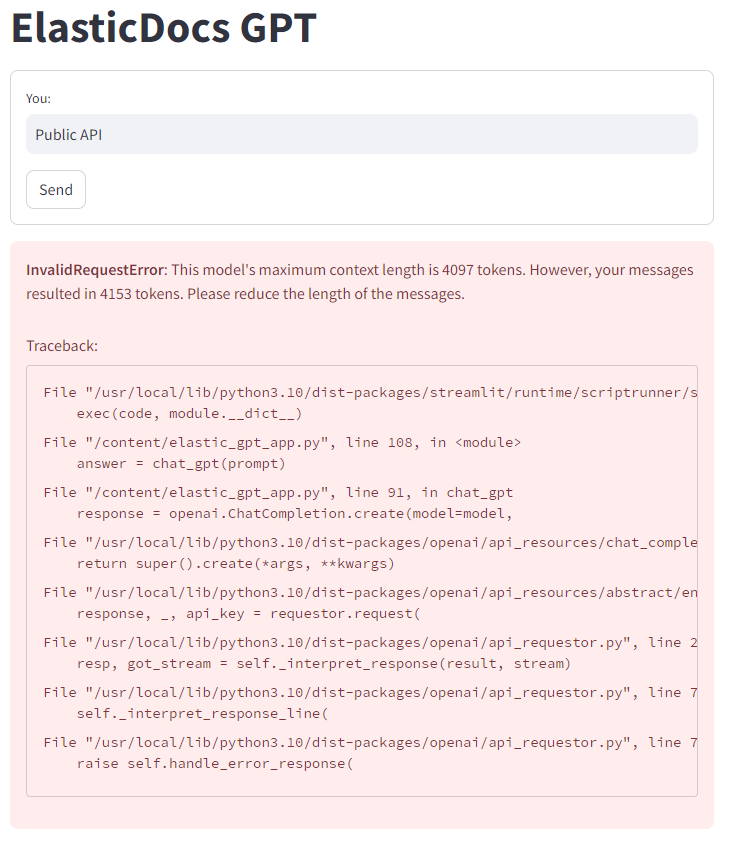

GPT처럼 앞선 대화 가져오려면 어떻게 할까
코드 바꿔야 하고 토큰 제한 풀어야 하는데 그거 생각해보기